In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split

In [78]:
classes = 10 
images = []
labels = [] 

for i in range(0, classes):
    imgList = os.listdir('C:/Users/hp/Downloads/Data/Data/'+str(i))
    for j in imgList:
        img = cv2.imread('C:/Users/hp/Downloads/Data/Data/'+str(i)+'/'+ str(j))
        img = cv2.resize(img, (28,28) )
        images.append(img)
        labels.append(i)
        
print(len(images))
print(len(labels))

10160
10160


In [79]:
images = np.array(images)
labels = np.array(labels)

print(images.shape)
print(labels.shape)

(10160, 28, 28, 3)
(10160,)


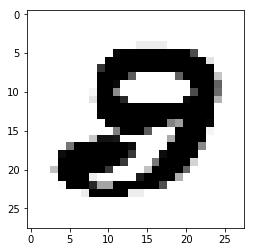

In [81]:
plt.imshow(images[10000])

In [82]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2)
print(train_images.shape)
print(test_images.shape)

(8128, 28, 28, 3)
(2032, 28, 28, 3)


In [83]:
def preProcess(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.equalizeHist(img)
    x,img=cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    img=img/255
    return img

train_images = np.array(list(map(preProcess, train_images)))
test_images = np.array(list(map(preProcess, test_images)))

In [84]:
print(train_images.shape)

(8128, 28, 28)


In [100]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

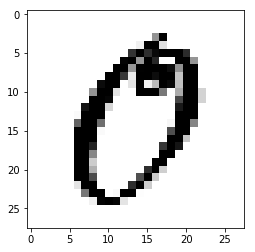

In [101]:
plt.imshow(images[200])

In [103]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28, 28, 1),  activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Conv2D(64, (3,3),  activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Conv2D(64, (3,3),  activation="relu"),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation="relu"),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [110]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [111]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

In [112]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.995):
            print("\nReached 99.5% accuracy so cancelling training!")
            self.model.stop_training = True

In [115]:
model.fit(train_images, train_labels,epochs = 30, validation_data = (test_images, test_labels))

Train on 8128 samples, validate on 2032 samples
Epoch 1/30
8128/8128 [==============================] - 5s 554us/sample - loss: 0.1766 - acc: 0.9459 - val_loss: 0.0688 - val_acc: 0.9808
Epoch 2/30
8128/8128 [==============================] - 5s 575us/sample - loss: 0.1167 - acc: 0.9649 - val_loss: 0.0437 - val_acc: 0.9857
Epoch 3/30
8128/8128 [==============================] - 5s 630us/sample - loss: 0.0884 - acc: 0.9705 - val_loss: 0.0416 - val_acc: 0.9857
Epoch 4/30
8128/8128 [==============================] - 5s 566us/sample - loss: 0.0752 - acc: 0.9776 - val_loss: 0.0311 - val_acc: 0.9902
Epoch 5/30
8128/8128 [==============================] - 4s 548us/sample - loss: 0.0719 - acc: 0.9779 - val_loss: 0.0252 - val_acc: 0.9926
Epoch 6/30
8128/8128 [==============================] - 5s 580us/sample - loss: 0.0600 - acc: 0.9798 - val_loss: 0.0238 - val_acc: 0.9936
Epoch 7/30
8128/8128 [==============================] - 5s 561us/sample - loss: 0.0512 - acc: 0.9831 - val_loss: 0.0233 - va

In [116]:
model.evaluate(test_images, test_labels)

2032/2032 [==============================] - 0s 148us/sample - loss: 0.0097 - acc: 0.9961


[0.009654637324052067, 0.996063]

In [122]:
model.save("Digit_Recognizer")
model.save("Digit_Recognizer.h5")